In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [52]:
# Read in home sales data
home_sales_df = pd.read_csv('../Source/Metro_sales_count_monthly.csv')
home_sales_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,11/30/2023,12/31/2023,1/31/2024,2/29/2024,3/31/2024,4/30/2024,5/31/2024,6/30/2024,7/31/2024,8/31/2024
0,102001,0,United States,country,NaN,200263,231896,257463,283461,296547,...,258258,246648,211949,234310,282773,318615,350767,326229,340368,332735
1,394913,1,"New York, NY",msa,NY,8416,8883,9809,10081,10685,...,11143,10675,10345,8916,10063,10993,12208,12446,13878,14512
2,753899,2,"Los Angeles, CA",msa,CA,4141,5044,6065,6868,7222,...,5119,4974,4401,4980,6101,6714,7119,6380,7027,7315
3,394463,3,"Chicago, IL",msa,IL,5570,6908,7230,7931,8781,...,7022,7129,5512,5765,7661,9277,10195,9768,10487,10850
4,394514,4,"Dallas, TX",msa,TX,4875,5519,5988,6679,6672,...,4625,4706,4207,5137,6144,6969,7458,6465,6758,6677


In [3]:
rental_df = pd.read_csv('../Source/Metro_Rentals.csv')
rental_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31
0,102001,0,United States,country,NaN,1310.862067,1317.635432,1326.592064,1337.166174,1347.094223,...,2213.347989,2213.517002,2214.817776,2222.706032,2233.819378,2249.433872,2262.554936,2275.422072,2285.166408,2294.365189
1,394913,1,"New York, NY",msa,NY,2227.886183,2251.118894,2267.851695,2284.702372,2288.073225,...,3443.856725,3424.581955,3442.399810,3485.052220,3519.700761,3562.290444,3572.887480,3602.208908,3614.929134,3640.093145
2,753899,2,"Los Angeles, CA",msa,CA,2621.942240,2633.999717,2654.095188,2664.578607,2690.731090,...,4292.282261,4288.887028,4298.547999,4324.901797,4338.474621,4359.776105,4378.386198,4403.227148,4421.621816,4438.079122
3,394463,3,"Chicago, IL",msa,IL,1583.391402,1588.623986,1598.554829,1611.847686,1625.919714,...,2340.672442,2340.558121,2348.018327,2358.976467,2372.088107,2383.105108,2410.442615,2433.382921,2449.264443,2459.756492
4,394514,4,"Dallas, TX",msa,TX,1409.839384,1418.548124,1429.044332,1443.495065,1457.098272,...,2340.480691,2344.493677,2343.881654,2353.395281,2357.393728,2376.919987,2390.547515,2397.750797,2402.623029,2407.581733


In [4]:
unemployment_rate_df = pd.read_csv('../Source/UnemploymentRate.csv')
unemployment_rate_df.head()

,DATE,UNRATE
0,1/1/1948,3.4
1,2/1/1948,3.8
2,3/1/1948,4.0
3,4/1/1948,3.9
4,5/1/1948,3.5


In [5]:
mortage_rate_df = pd.read_csv('../Source/MORTGAGE30US.csv')
mortage_rate_df.head()

,DATE,MORTGAGE30US
0,4/2/1971,7.33
1,4/9/1971,7.31
2,4/16/1971,7.31
3,4/23/1971,7.31
4,4/30/1971,7.29


In [6]:
med_hhi_df = pd.read_csv('../Source/MedianHHI.csv')
med_hhi_df.head()

,DATE,MEHOINUSA672N
0,1/1/1984,58930
1,1/1/1985,60050
2,1/1/1986,62280
3,1/1/1987,63060
4,1/1/1988,63530


In [7]:
# Define the columns to keep:
# First five columns
columns_to_keep = home_sales_df.columns[:5]

In [13]:
# Extract year from columns and identify columns for  2018, 2019, 2020, 2021, and 2022
def extract_year_from_column(col_name):
    try:
        return col_name.split('/')[2]  # Extract year from 'YYYY-MM-DD'
    except IndexError:
        return None

In [14]:
# Create a set of years to keep
years_to_keep = {'2018', '2019', '2020', '2021', '2022'}

In [15]:
# Filter columns to keep only those starting with the specified years
columns_for_years = [col for col in home_sales_df.columns if extract_year_from_column(col) in years_to_keep]

In [16]:
# Combine the columns to keep
all_columns_to_keep = list(columns_to_keep) + columns_for_years

In [17]:
# Filter DataFrame
home_sales_df_filtered = home_sales_df[all_columns_to_keep]
home_sales_df_filtered

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,...,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022
0,102001,0,United States,country,NaN,280933,278908,380147,401495,463931,...,441561,439319,464680,482675,412149,428785,379953,332027,286113.0,272462
1,394913,1,"New York, NY",msa,NY,14617,12540,14184,14950,16953,...,18338,16448,17902,21234,19507,20758,16815,15084,14285.0,13202
2,753899,2,"Los Angeles, CA",msa,CA,6842,6768,9759,9357,10332,...,10348,9912,9420,9226,7506,7867,7255,6251,5413.0,5204
3,394463,3,"Chicago, IL",msa,IL,7426,7001,10927,12751,15250,...,12383,12704,13720,14908,12464,12098,10896,9063,8062.0,7221
4,394514,4,"Dallas, TX",msa,TX,5260,6027,7677,7913,9379,...,7960,8116,8875,8923,8010,8344,7200,6163,5087.0,4967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,395006,92,"Provo, UT",msa,UT,474,542,664,681,819,...,1003,956,995,953,722,780,684,505,436.0,420
90,395160,93,"Toledo, OH",msa,OH,452,446,624,653,833,...,633,697,787,838,835,812,726,684,569.0,598
91,395224,94,"Wichita, KS",msa,KS,429,408,676,675,849,...,445,470,464,556,470,525,346,390,288.0,291
92,394549,95,"Durham, NC",msa,NC,538,552,858,920,1098,...,932,965,1104,1163,939,874,775,671,582.0,576


In [19]:
# Function to check if a column name is a date and convert it
def format_column_date(column_name):
    try:
        # Attempt to convert to datetime and then format
        return pd.to_datetime(column_name).strftime('%Y-%m-%d')
    except:
        # If conversion fails, return the original column name (for non-date columns)
        return column_name

# Apply the function to all column names
home_sales_df.columns = [format_column_date(col) for col in home_sales_df.columns]

# Display the updated DataFrame with renamed columns
home_sales_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31
0,102001,0,United States,country,NaN,200263,231896,257463,283461,296547,...,258258,246648,211949,234310,282773,318615,350767,326229,340368,332735
1,394913,1,"New York, NY",msa,NY,8416,8883,9809,10081,10685,...,11143,10675,10345,8916,10063,10993,12208,12446,13878,14512
2,753899,2,"Los Angeles, CA",msa,CA,4141,5044,6065,6868,7222,...,5119,4974,4401,4980,6101,6714,7119,6380,7027,7315
3,394463,3,"Chicago, IL",msa,IL,5570,6908,7230,7931,8781,...,7022,7129,5512,5765,7661,9277,10195,9768,10487,10850
4,394514,4,"Dallas, TX",msa,TX,4875,5519,5988,6679,6672,...,4625,4706,4207,5137,6144,6969,7458,6465,6758,6677


In [20]:
# Select columns for date rang (2018-2022)
date_columns = [col for col in home_sales_df.columns if '2018' in col or 
                '2019' in col or '2020' in col or '2021' in col or '2022' in col]

In [ ]:
# Export as a json file
home_sales_df_filtered.head(1).to_json('home_output_data.json', orient='records', indent=4)

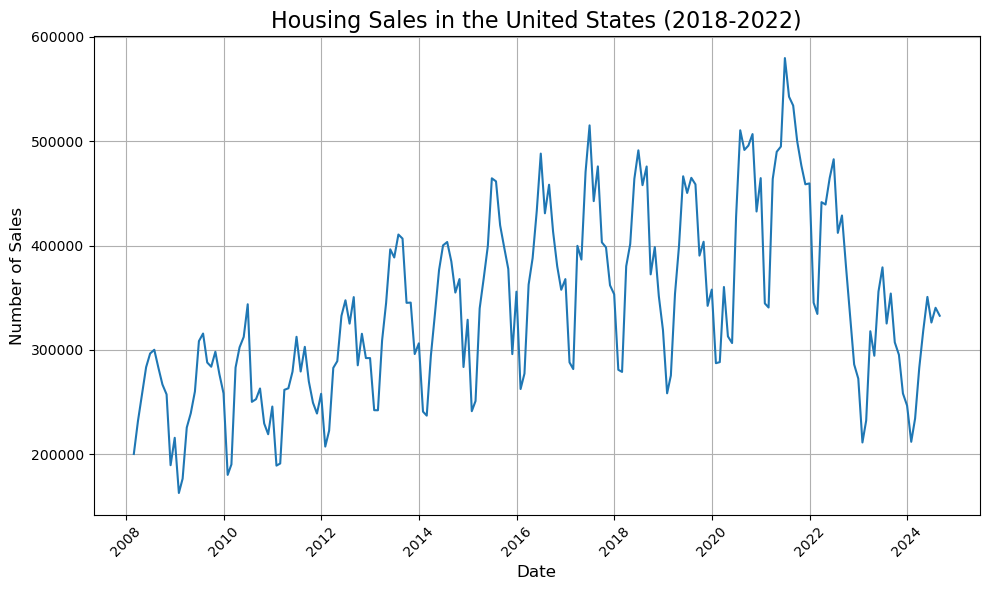

In [22]:
# Select the United States row (assuming RegionID = 102001 or adjust accordingly)
us_home_sales = home_sales_df[home_sales_df['RegionName'] == 'United States']

# Transpose the DataFrame to have dates as rows (instead of columns)
us_home_sales_transposed = us_home_sales.iloc[:, 5:].T  # Assuming first few columns are non-date related

# Rename the index to 'Date' for clarity
us_home_sales_transposed.index.name = 'Date'

# Convert the index to datetime for plotting
us_home_sales_transposed.index = pd.to_datetime(us_home_sales_transposed.index)

# Rename the columns to something meaningful
us_home_sales_transposed.columns = ['Sales']

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(us_home_sales_transposed.index, us_home_sales_transposed['Sales'])

# Title and labels
plt.title('Housing Sales in the United States (2018-2022)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the graph
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
# calculate avg housing price for each month
average_housing_sales = home_sales_df[date_columns].mean()

In [28]:
# Convert to a DataFrame
average_housing_sales_df = average_housing_sales.reset_index()
average_housing_sales_df.columns = ['Date', 'Average_Sales']

In [29]:
# Convert the 'Date' column to datetime 
average_housing_sales_df['Date'] = pd.to_datetime(average_housing_sales_df['Date'], format='%Y-%m-%d')

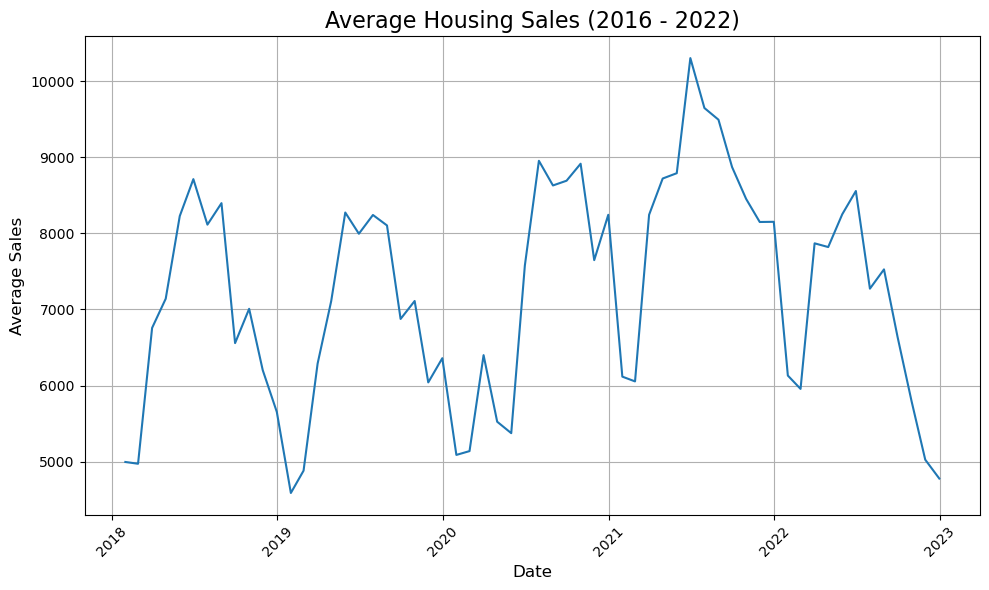

In [31]:
# Plot average housing prices over time
plt.figure(figsize=(10, 6))
plt.plot(average_housing_sales_df['Date'], average_housing_sales_df['Average_Sales'])

# Add labels and title
plt.title('Average Housing Sales (2016 - 2022)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.grid(True)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
# Select the columns for rental prices from 2016 to 2024
rental_date_columns = [col for col in rental_df.columns if '2018' in col or 
                       '2019' in col or '2020' in col or '2021' in col or '2022' in col]

In [33]:
# Calculate the average rental price for each month 
average_rental_prices = rental_df[rental_date_columns].mean()

# Convert to a DataFrame 
average_rental_prices_df = average_rental_prices.reset_index()
average_rental_prices_df.columns = ['Date', 'Average_Price']

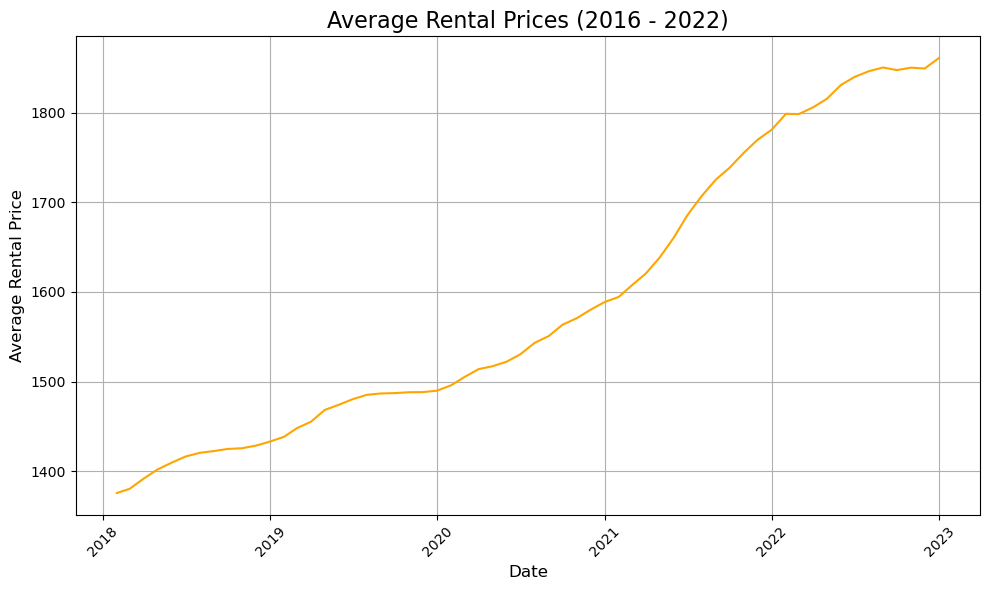

In [34]:
# Convert the 'Date' column to datetime format for better plotting
average_rental_prices_df['Date'] = pd.to_datetime(average_rental_prices_df['Date'], format='%Y-%m-%d')

# Plot the average rental prices over time
plt.figure(figsize=(10, 6))

# Plot with smaller markers for better visibility
plt.plot(average_rental_prices_df['Date'], average_rental_prices_df['Average_Price'], color='orange')

# Add labels and title
plt.title('Average Rental Prices (2016 - 2022)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Rental Price', fontsize=12)
plt.grid(True)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

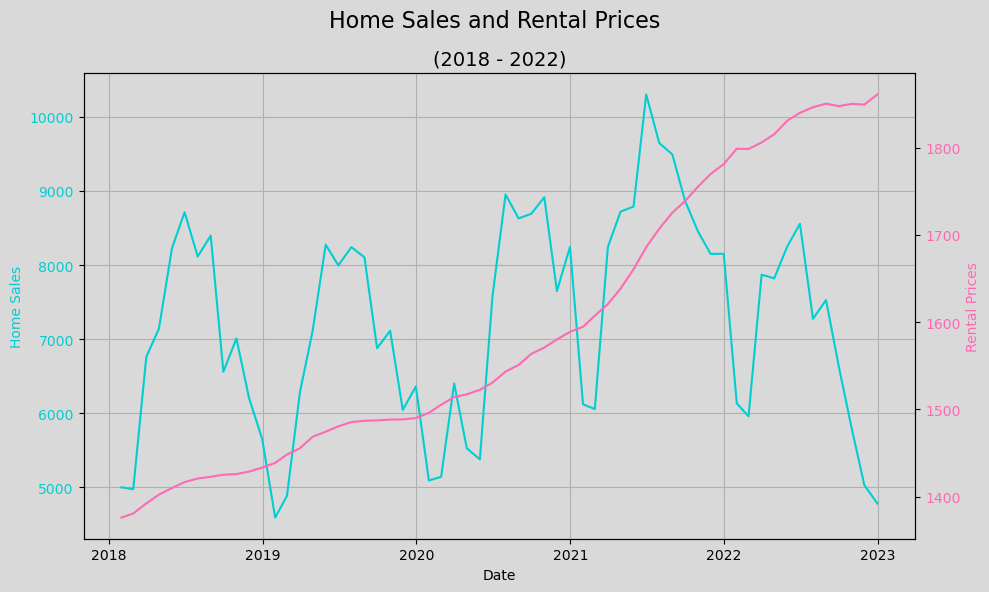

In [49]:
# Step 1: Convert 'Date' to datetime format if not already done
average_housing_sales_df['Date'] = pd.to_datetime(average_housing_sales_df['Date'], format='%Y-%m-%d')
average_rental_prices_df['Date'] = pd.to_datetime(average_rental_prices_df['Date'], format='%Y-%m-%d')

# Step 2: Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot home sales on the primary y-axis (left) with the teal color
color = '#00CED1'  # Teal color for home sales
ax1.set_xlabel('Date')
ax1.set_ylabel('Home Sales', color=color)
ax1.plot(average_housing_sales_df['Date'], average_housing_sales_df['Average_Sales'], 
         color=color, label='Home Sales')
ax1.tick_params(axis='y', labelcolor=color)

# Step 3: Create a secondary y-axis for the rental prices (right) with the pink color
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = '#FF69B4'  # Pink color for rental prices
ax2.set_ylabel('Rental Prices', color=color)  # we already handled the x-label with ax1
ax2.plot(average_rental_prices_df['Date'], average_rental_prices_df['Average_Price'], 
         color=color, label='Rental Prices')
ax2.tick_params(axis='y', labelcolor=color)

# Step 4: Add title and grid
plt.title('(2018 - 2022)', fontsize=14)
ax1.grid(True)

# Add subheading
plt.suptitle('Home Sales and Rental Prices', fontsize=16)


# Change the background color
ax1.set_facecolor('#D9D9D9')  # Set the background color for the primary axis
ax2.set_facecolor('#D9D9D9')  # Set the background color for the secondary axis (if applicable)
fig.patch.set_facecolor('#D9D9D9')

# Step 5: Display the plot
fig.tight_layout()  # adjust subplots to fit into figure area.
plt.xticks(rotation=45)
plt.savefig("../IMAGES/HomeSales_and_RentalPrices.png")
plt.show()


In [50]:
# Read in home Values data
home_values_df = pd.read_csv('../Source/Metro_Home_Values.csv')
home_values_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31
0,102001,0,United States,country,NaN,123951.733006,124163.176264,124425.524492,124988.958362,125637.500450,...,355986.448327,356640.365507,357118.576760,357576.035711,358418.372959,360011.602927,361969.362164,3.635033e+05,3.641659e+05,3.643848e+05
1,394913,1,"New York, NY",msa,NY,219657.598399,220586.011622,221519.660004,223407.993412,225353.501267,...,656116.650291,658992.330717,662322.088290,665541.460972,669925.455906,675684.524493,682290.159549,6.873056e+05,6.905686e+05,6.932481e+05
2,753899,2,"Los Angeles, CA",msa,CA,236649.976987,237553.116159,238728.814647,241071.926563,243614.826354,...,978656.081035,988006.132016,993962.586203,994044.629696,990763.189872,989599.749912,993777.833894,1.000601e+06,1.005222e+06,1.010107e+06
3,394463,3,"Chicago, IL",msa,IL,159899.676257,160054.921113,160340.806271,161051.946252,161901.787792,...,328270.794339,329219.545752,329991.513159,330838.545303,332482.161364,335195.288195,338356.149580,3.407269e+05,3.421063e+05,3.429366e+05
4,394514,4,"Dallas, TX",msa,TX,129057.198121,129114.277857,129184.712729,129363.326656,129593.351700,...,380533.777024,380382.508383,380056.886976,380085.827764,380580.411239,381762.207346,382759.281581,3.829150e+05,3.822440e+05,3.812958e+05
